In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoker-status-prediction/train_dataset.csv


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler, PowerTransformer
import math

In [12]:
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("/kaggle/input/smoker-status-prediction/train_dataset.csv")

In [14]:
# 1. REMOVE DUPLICATES
# ============================================================
print("----- Before Removing Duplicates -----")
print("Shape:", df.shape)

dup_count = df.duplicated().sum()
print(f"Duplicate Rows Found: {dup_count}")

df = df.drop_duplicates().reset_index(drop=True)

print("----- After Removing Duplicates -----")
print("Shape:", df.shape)


----- Before Removing Duplicates -----
Shape: (38984, 23)
Duplicate Rows Found: 5517
----- After Removing Duplicates -----
Shape: (33467, 23)


In [15]:
df_clean = df.copy()

In [16]:
# 2. FIX SKEWNESS (Yeo-Johnson)
# =============================================
target_col = "smoking"
numerical_cols = df_clean.select_dtypes(include="number").columns.tolist()
numerical_cols = [col for col in numerical_cols if col != target_col]

pt = PowerTransformer(method='yeo-johnson')

df_skew_fixed = df_clean.copy()
df_skew_fixed[numerical_cols] = pt.fit_transform(df_clean[numerical_cols])

df_clean = df_skew_fixed.copy()

In [17]:
# 3. ROBUST SCALING (after skew fix)
# ==================================================
scaler = RobustScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

df_clean.to_csv("/kaggle/working/train_dataset_scaled_robust_transformation.csv", index=False)

print("Final scaled dataset shape:", df_clean.shape)

Final scaled dataset shape: (33467, 23)


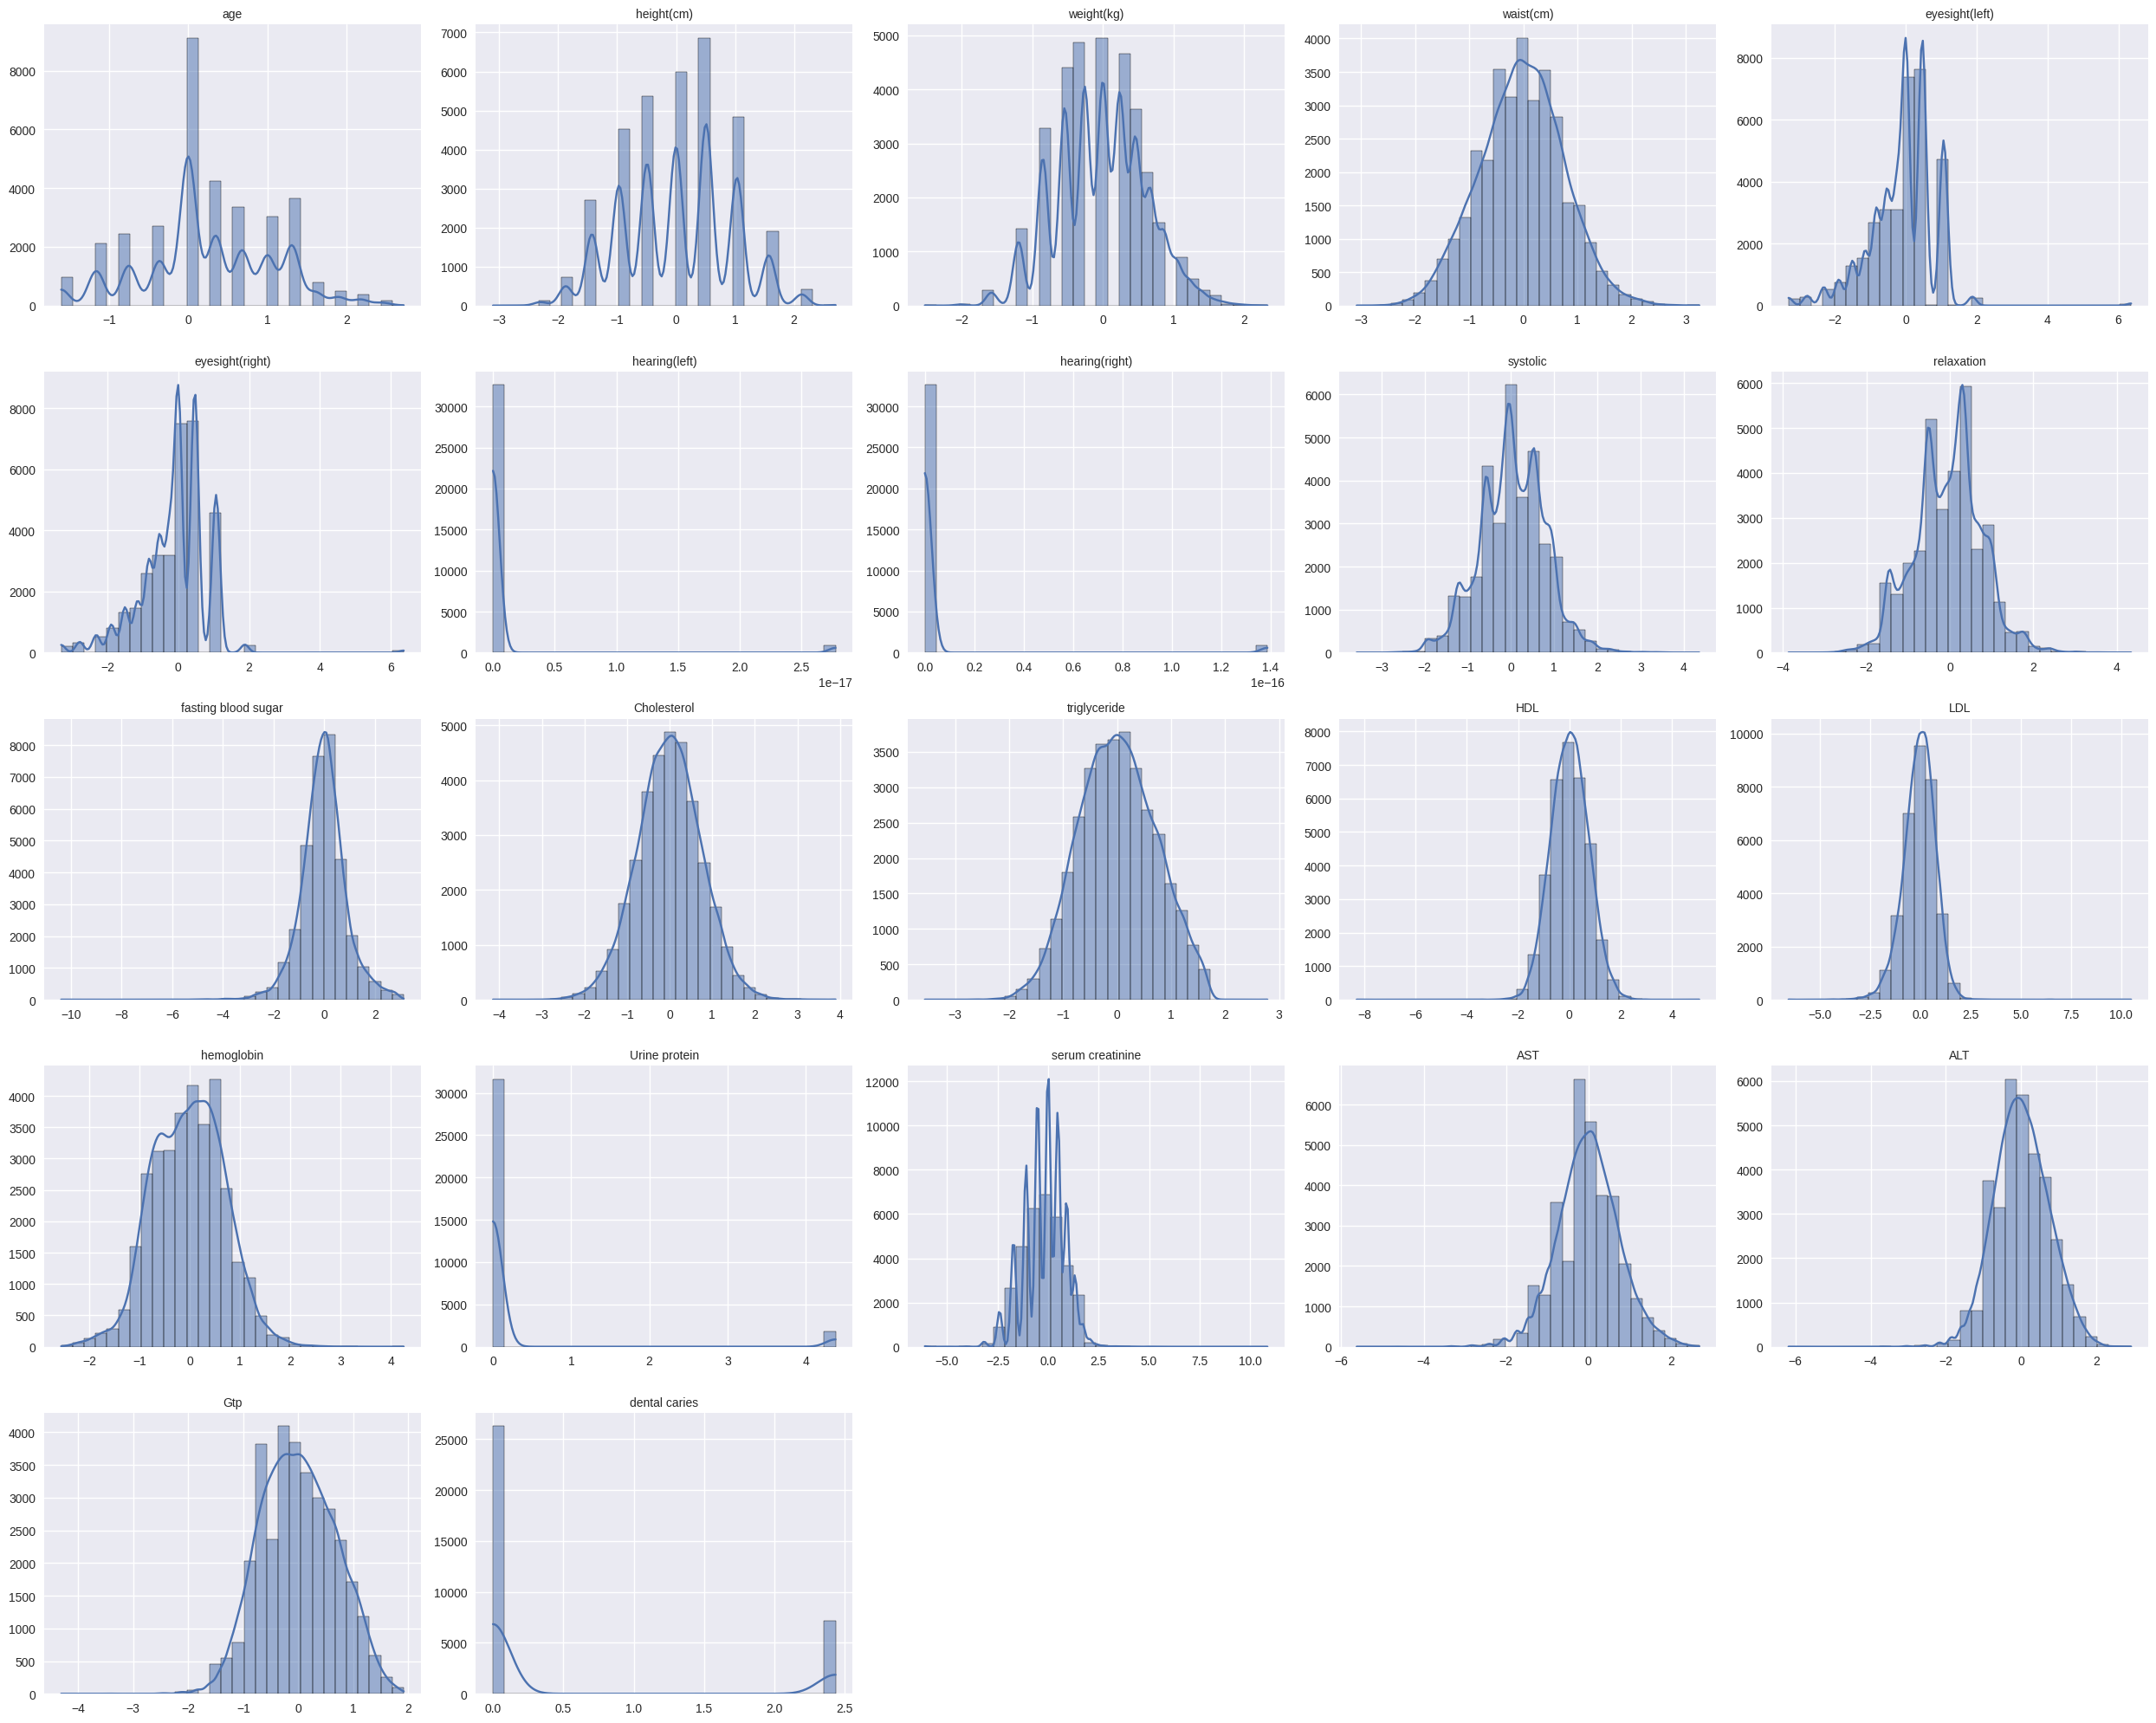

In [18]:
# 4. DISTRIBUTION PLOTS AFTER TRANSFORMATION
# =============================================
cols_per_row = 5
rows = math.ceil(len(numerical_cols) / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, rows * 4))
plt.style.use("seaborn-v0_8")

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()